In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import seaborn as sns
import numpy as np

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  


In [ ]:
test.info()

In [ ]:
train.duplicated().sum()

0

In [ ]:
train.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [ ]:
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


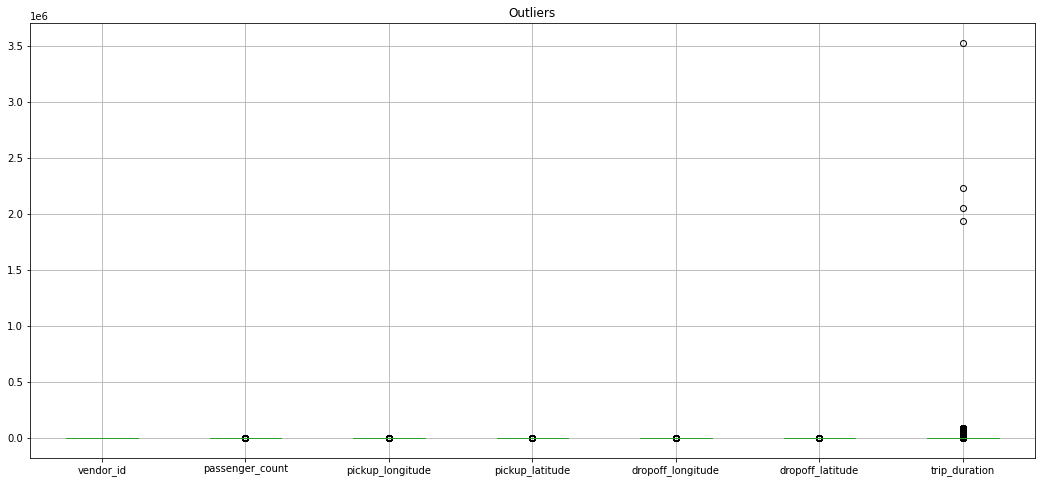

In [ ]:
plt.subplots(figsize=(18,8))
plt.title("Outliers")
train.boxplot();

In [ ]:
train = train[(train.trip_duration < 6000)]

In [ ]:
train = train[(train.passenger_count > 0)]

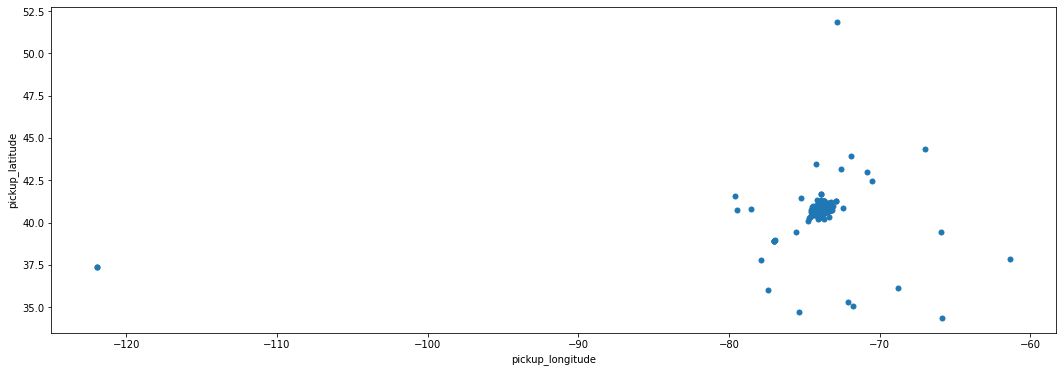

In [ ]:
pickup_longitude = list(train.pickup_longitude)
pickup_latitude = list(train.pickup_latitude)

plt.subplots(figsize=(18,6))
plt.plot(pickup_longitude, pickup_latitude, '.', alpha = 1, markersize = 10)

plt.show()

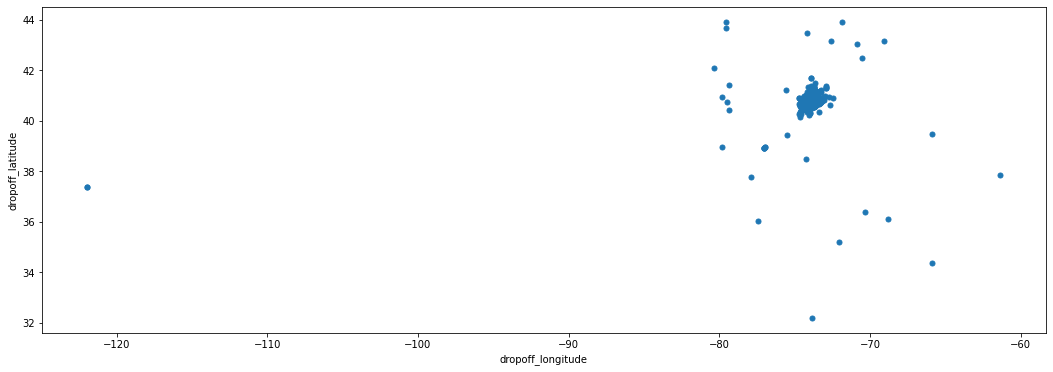

In [ ]:
dropoff_longitude = list(train.dropoff_longitude)
dropoff_latitude = list(train.dropoff_latitude)

plt.subplots(figsize=(18,6))
plt.plot(dropoff_longitude, dropoff_latitude, '.', alpha = 1, markersize = 10)
plt.show()

In [ ]:
train = train[(train.pickup_longitude > -100)]
train = train[(train.pickup_latitude < 50)]

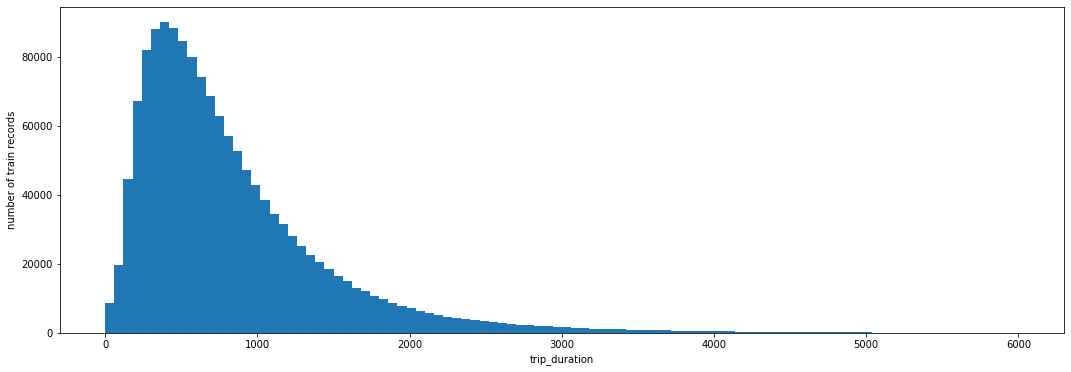

In [ ]:
plt.subplots(figsize=(18,6))
plt.hist(train['trip_duration'].values, bins=100)

plt.show()

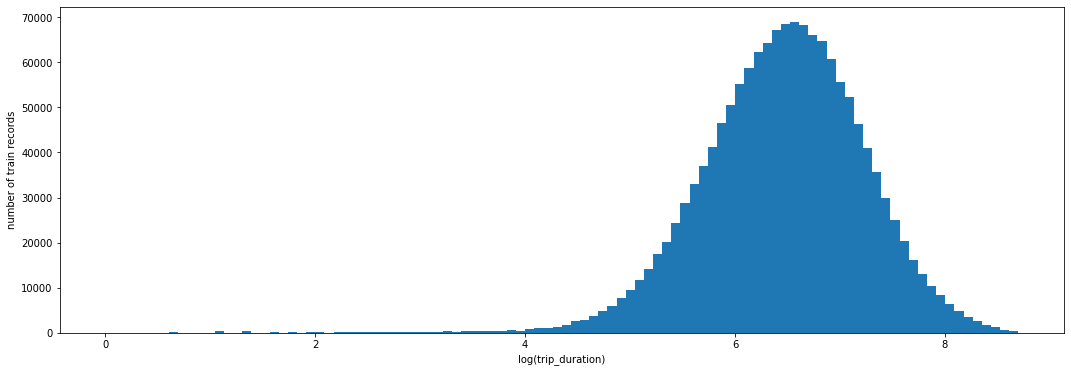

In [ ]:
plt.subplots(figsize=(18,6))
train['trip_duration'] = np.log(train['trip_duration'].values)
plt.hist(train['trip_duration'].values, bins=100)

plt.show()

In [ ]:
train = pd.concat([train, pd.get_dummies(train['store_and_fwd_flag'])], axis=1)
test = pd.concat([test, pd.get_dummies(test['store_and_fwd_flag'])], axis=1)

train.drop(['store_and_fwd_flag'], axis=1, inplace=True)

train = pd.concat([train, pd.get_dummies(train['vendor_id'])], axis=1)
test = pd.concat([test, pd.get_dummies(test['vendor_id'])], axis=1)

train.drop(['vendor_id'], axis=1, inplace=True)

In [ ]:
train['pickup_datetime'] = pd.to_datetime(train.pickup_datetime)
test['pickup_datetime'] = pd.to_datetime(test.pickup_datetime)

train.drop(['dropoff_datetime'], axis=1, inplace=True)

train['month'] = train.pickup_datetime.dt.month
train['week'] = train.pickup_datetime.dt.week
train['weekday'] = train.pickup_datetime.dt.weekday
train['hour'] = train.pickup_datetime.dt.hour
train['minute'] = train.pickup_datetime.dt.minute
train['minute_oftheday'] = train['hour'] * 60 + train['minute']
train.drop(['minute'], axis=1, inplace=True)

test['month'] = test.pickup_datetime.dt.month
test['week'] = test.pickup_datetime.dt.week
test['weekday'] = test.pickup_datetime.dt.weekday
test['hour'] = test.pickup_datetime.dt.hour
test['minute'] = test.pickup_datetime.dt.minute
test['minute_oftheday'] = test['hour'] * 60 + test['minute']
test.drop(['minute'], axis=1, inplace=True)

train.drop(['pickup_datetime'], axis=1, inplace=True)

train.info()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456015 entries, 0 to 1458643
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   id                 1456015 non-null  object 
 1   passenger_count    1456015 non-null  int64  
 2   pickup_longitude   1456015 non-null  float64
 3   pickup_latitude    1456015 non-null  float64
 4   dropoff_longitude  1456015 non-null  float64
 5   dropoff_latitude   1456015 non-null  float64
 6   trip_duration      1456015 non-null  float64
 7   N                  1456015 non-null  uint8  
 8   Y                  1456015 non-null  uint8  
 9   1                  1456015 non-null  uint8  
 10  2                  1456015 non-null  uint8  
 11  month              1456015 non-null  int64  
 12  week               1456015 non-null  int64  
 13  weekday            1456015 non-null  int64  
 14  hour               1456015 non-null  int64  
 15  minute_oftheday    1456015 non-n

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
R = 6367 

def haversine_np(lon1, lat1, lon2, lat2):
  lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

  dlon = lon2 - lon1
  dlat = lat2 - lat1

  a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

  c = 2 * np.arcsin(np.sqrt(a))
  km = R * c
  return km

In [ ]:
train['distance'] = haversine_np(train['pickup_longitude'], train['pickup_latitude'],
                              train['dropoff_longitude'], train['dropoff_latitude'])
train.head()

,id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,N,Y,1,2,month,week,weekday,hour,minute_oftheday,distance
0,id2875421,1,-73.982155,40.767937,-73.964630,40.765602,6.120297,1,0,0,1,3,11,0,17,1044,1.497580
1,id2377394,1,-73.980415,40.738564,-73.999481,40.731152,6.496775,1,0,1,0,6,23,6,0,43,1.804374
2,id3858529,1,-73.979027,40.763939,-74.005333,40.710087,7.661056,1,0,0,1,1,3,1,11,695,6.381090
3,id3504673,1,-74.010040,40.719971,-74.012268,40.706718,6.061457,1,0,0,1,4,14,2,19,1172,1.484566
4,id2181028,1,-73.973053,40.793209,-73.972923,40.782520,6.075346,1,0,0,1,3,12,5,13,810,1.187842


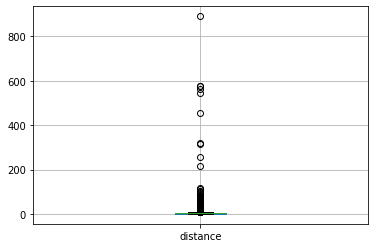

In [ ]:
train.boxplot(column='distance', return_type='axes');

In [ ]:
train = train[(train.distance < 200)]

In [ ]:
train['speed'] = train.distance / train.trip_duration

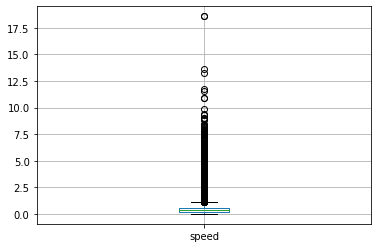

In [ ]:
train.boxplot(column='speed', return_type='axes');

In [ ]:
train = train[(train.speed < 30)]

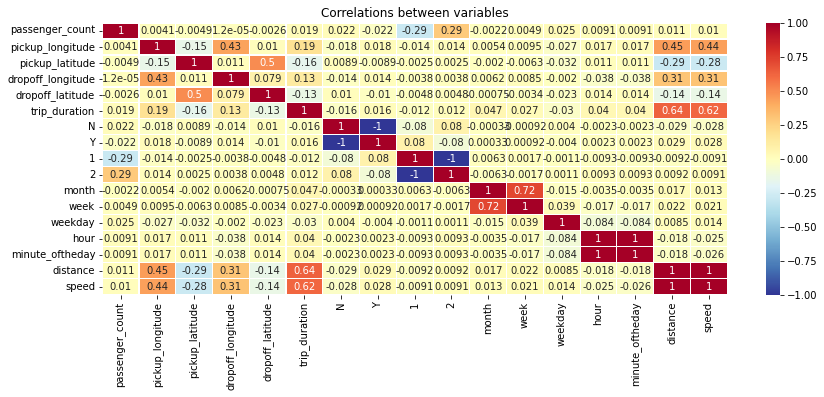

In [ ]:
fig, ax = plt.subplots(figsize=(14,5))  
sns.heatmap(data=train.corr(), annot=True, cmap = plt.cm.RdYlBu_r, linewidths=.1, ax=ax).set_title('Correlations between variables');

In [ ]:
train.head()

,id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,N,Y,1,2,month,week,weekday,hour,minute_oftheday,distance,speed
0,id2875421,1,-73.982155,40.767937,-73.964630,40.765602,6.120297,1,0,0,1,3,11,0,17,1044,1.497580,0.244691
1,id2377394,1,-73.980415,40.738564,-73.999481,40.731152,6.496775,1,0,1,0,6,23,6,0,43,1.804374,0.277734
2,id3858529,1,-73.979027,40.763939,-74.005333,40.710087,7.661056,1,0,0,1,1,3,1,11,695,6.381090,0.832926
3,id3504673,1,-74.010040,40.719971,-74.012268,40.706718,6.061457,1,0,0,1,4,14,2,19,1172,1.484566,0.244919
4,id2181028,1,-73.973053,40.793209,-73.972923,40.782520,6.075346,1,0,0,1,3,12,5,13,810,1.187842,0.195518


In [ ]:
y = train['trip_duration']
train.drop(['trip_duration'], axis=1, inplace=True)
train.drop(['id'], axis=1, inplace=True)
X = train
print (X.shape, y.shape)

(1455973, 16) (1455973,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1164778, 16), (1164778,), (291195, 16), (291195,))

In [ ]:
from sklearn.metrics import mean_squared_error as MSE

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
print(gb.score(X_train, y_train), gb.score(X_test, y_test))
print(np.sqrt(MSE(y_test, gb.predict(X_test))))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.8095792258524721 0.8091995234208893


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.3392266324275552


In [ ]:
import lightgbm as lgb

lgb_params = {
    'metric': 'rmse',
    'is_training_metric': True}

lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test)
lgb_model = lgb.train(lgb_params, lgb_train, num_boost_round=100, valid_sets=[lgb_train, lgb_test], early_stopping_rounds=5)


[1]	training's rmse: 0.721829	valid_1's rmse: 0.721628
Training until validation scores don't improve for 5 rounds.
[2]	training's rmse: 0.672771	valid_1's rmse: 0.672632
[3]	training's rmse: 0.6291	valid_1's rmse: 0.629095
[4]	training's rmse: 0.590258	valid_1's rmse: 0.590274
[5]	training's rmse: 0.556088	valid_1's rmse: 0.556116
[6]	training's rmse: 0.525947	valid_1's rmse: 0.525942
[7]	training's rmse: 0.498832	valid_1's rmse: 0.498848
[8]	training's rmse: 0.47606	valid_1's rmse: 0.476063
[9]	training's rmse: 0.454214	valid_1's rmse: 0.454134
[10]	training's rmse: 0.435825	valid_1's rmse: 0.435759
[11]	training's rmse: 0.419348	valid_1's rmse: 0.41927
[12]	training's rmse: 0.403743	valid_1's rmse: 0.403558
[13]	training's rmse: 0.390063	valid_1's rmse: 0.389837
[14]	training's rmse: 0.378142	valid_1's rmse: 0.377928
[15]	training's rmse: 0.36703	valid_1's rmse: 0.36674
[16]	training's rmse: 0.356728	valid_1's rmse: 0.356372
[17]	training's rmse: 0.347556	valid_1's rmse: 0.347153
[1

In [ ]:
from lightgbm import LGBMRegressor

lgbm = lgb.LGBMRegressor()
lgbm.fit(X, y)
print(lgbm.score(X_train, y_train), lgbm.score(X_test, y_test))
print(np.sqrt(MSE(y, lgbm.predict(X))))


0.9297961037681841 0.931331117092785
0.2053845408173023


In [ ]:
lgb_df = lgb.Dataset(X, y)
lgb.cv(lgb_params, lgb_df, stratified=False)

from sklearn.model_selection import cross_val_score

cv_score = cross_val_score(lgbm, X, y, cv=5)
print(cv_score)
print(np.mean(cv_score))


[0.9275299  0.92828339 0.92874037 0.93013997 0.92922119]
0.928782965555038


In [ ]:
def rel_RMSE(estimator, X, y):
    lgbm.fit(X, y)
    return np.sqrt(MSE(y, lgbm.predict(X)))

In [ ]:
from sklearn.model_selection import ShuffleSplit
from local.lib import calhousing as ch
%matplotlib inline
lgbm = lgb.LGBMRegressor()
lgbm.fit(X, y)

cv = ShuffleSplit(n_splits=10, test_size=.2)
ch.plot_learning_curve(lgbm, lgbm.__class__.__name__, X, y, cv=cv, scoring= rel_RMSE, ylim=(0.18,0.22))
